In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv('/Users/nastyachem/elbrus/phaze0/3week/project/prod_0/data/_data.csv')

pd.set_option('display.max_columns',None) #Выводим все скрытые колонки
df.head(1)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157


In [3]:
pd.set_option('max_colwidth', None)
df.head(1)
#выводим полное описание строк

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",+79166369231,"Без комиссии для нанимателя! Бонус коллегам 125.000 руб! Предлагается роскошная четырехкомнатная квартира в ЖК Новый Арбат. \nКвартира укомплектована мебелью и техникой премиум-класса. Кондиционирование, теплые полы. \n\nФункциональная планировка: изолированная кухня, гостиная, три спальни, два совмещенных санузла с ванной и душем, гардеробная, прихожая с гостевым санузлом и постирочной. \n\nДом находится под круглосуточной охраной. В подземном паркинге в стоимость включено 1 м/м. Рядом есть вся необходимая инфраструктура., 26 фото",Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157


In [4]:
df.info()
#выводим краткую информацию о DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

In [5]:
df['ID  объявления'].nunique()
# Проверка на уникальность id, пришли к выводу что таим образом дубликаты не найти, потому что каждое объявление имеет уникальный номер объявления.

23368

In [6]:
df_moscow = df[df['Адрес'].str.lower().str.contains('москва')]

#Выводим только те объявления, которые относятся к Москве

In [7]:
#Удаляем неинформативные Series
df1= df_moscow.copy()
df1 = df1.drop(columns=['Дополнительно','Описание','Unnamed: 0','Телефоны','Тип','Название ЖК','Площадь комнат, м2','Серия дома','Ссылка на объявление'])
df1.set_index(['ID  объявления'],inplace=True)



In [8]:
#Вывод процентного соотношения пропусков в столбецах (в процентах)

print(f"""Количество пропущенных значений в колонках в процентах '{df1.columns[0]}': {df1.isnull().sum()*100/19737}""")

Количество пропущенных значений в колонках в процентах 'Количество комнат': Количество комнат            2.710645
Метро                        1.753053
Адрес                        0.000000
Площадь, м2                  0.000000
Дом                          0.000000
Парковка                    56.614480
Цена                         0.000000
Ремонт                      12.479100
Балкон                      33.591731
Окна                        26.093125
Санузел                     10.340984
Можно с детьми/животными    24.902467
Высота потолков, м          46.623094
Лифт                        21.239297
Мусоропровод                40.568475
dtype: float64


Мы видим в каких столбцах значение NaN превышает 40% и принимаем решение удалить эти Series, так как будет не информативно заполнять их средней/модой/медианой. 

In [9]:
df1 = df1.drop(columns=['Парковка','Высота потолков, м','Мусоропровод'])


In [10]:
#Преобразовали колонку "Метро" в строковый вид, оставив только наименование станции метро
df_m = df1.copy()
df_m['Метро'] =  df_m['Метро'].astype('str')
df_m['Метро'] =  df_m['Метро'].apply(lambda x: x[:x.find('(')])


In [11]:
#Отсортировали по количеству объявлений на каждой станции метро. Выбрали 10 самых популярных
uniq_m = df_m['Метро'].value_counts().head(10)
un_m = uniq_m.drop('na') # Удалили значения "nan"
nf = un_m.to_frame()
nf

,count
Метро,
м. Селигерская,393
м. Щелковская,313
м. Бабушкинская,284
м. Новогиреево,282
м. Коломенская,273
м. Водный стадион,220
м. Проспект Вернадского,214
м. Медведково,213
м. Сокол,208


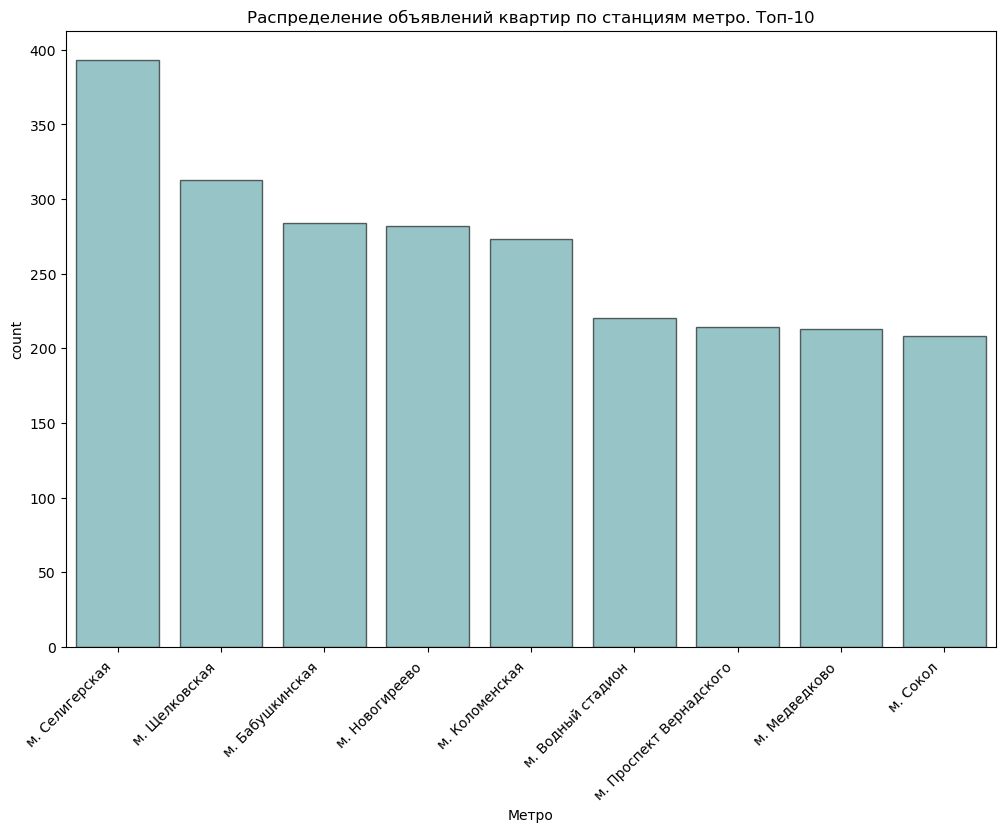

In [12]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=nf, x= 'Метро',y='count', color='#45aaae',edgecolor='black', alpha=0.6)
plt.title('Распределение объявлений квартир по станциям метро. Топ-10')
plt.xticks(rotation=45,ha='right')
plt.show()
#Создали гистограмму на основе данных где видно что самой популярной станциейпо объявлениям является м.Селигерская, далее показатели незначительно снижаются

In [13]:
#Обработка колонок с площадью и ценой

df_m['Площадь, м2'] = df_m['Площадь, м2'].astype('str')
df_m['Площадь, м2'] = df_m['Площадь, м2'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df_m['Площадь, м2'] =  df_m['Площадь, м2'].astype('float')


In [14]:
df_m['Цена'] = df_m['Цена'].astype('str')
df_m['Цена'] = df_m['Цена'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)
df_m['Цена'] =  df_m['Цена'].astype('float')

Text(0.5, 1.0, 'Зависимость цены аренды квартиры от ремонта')

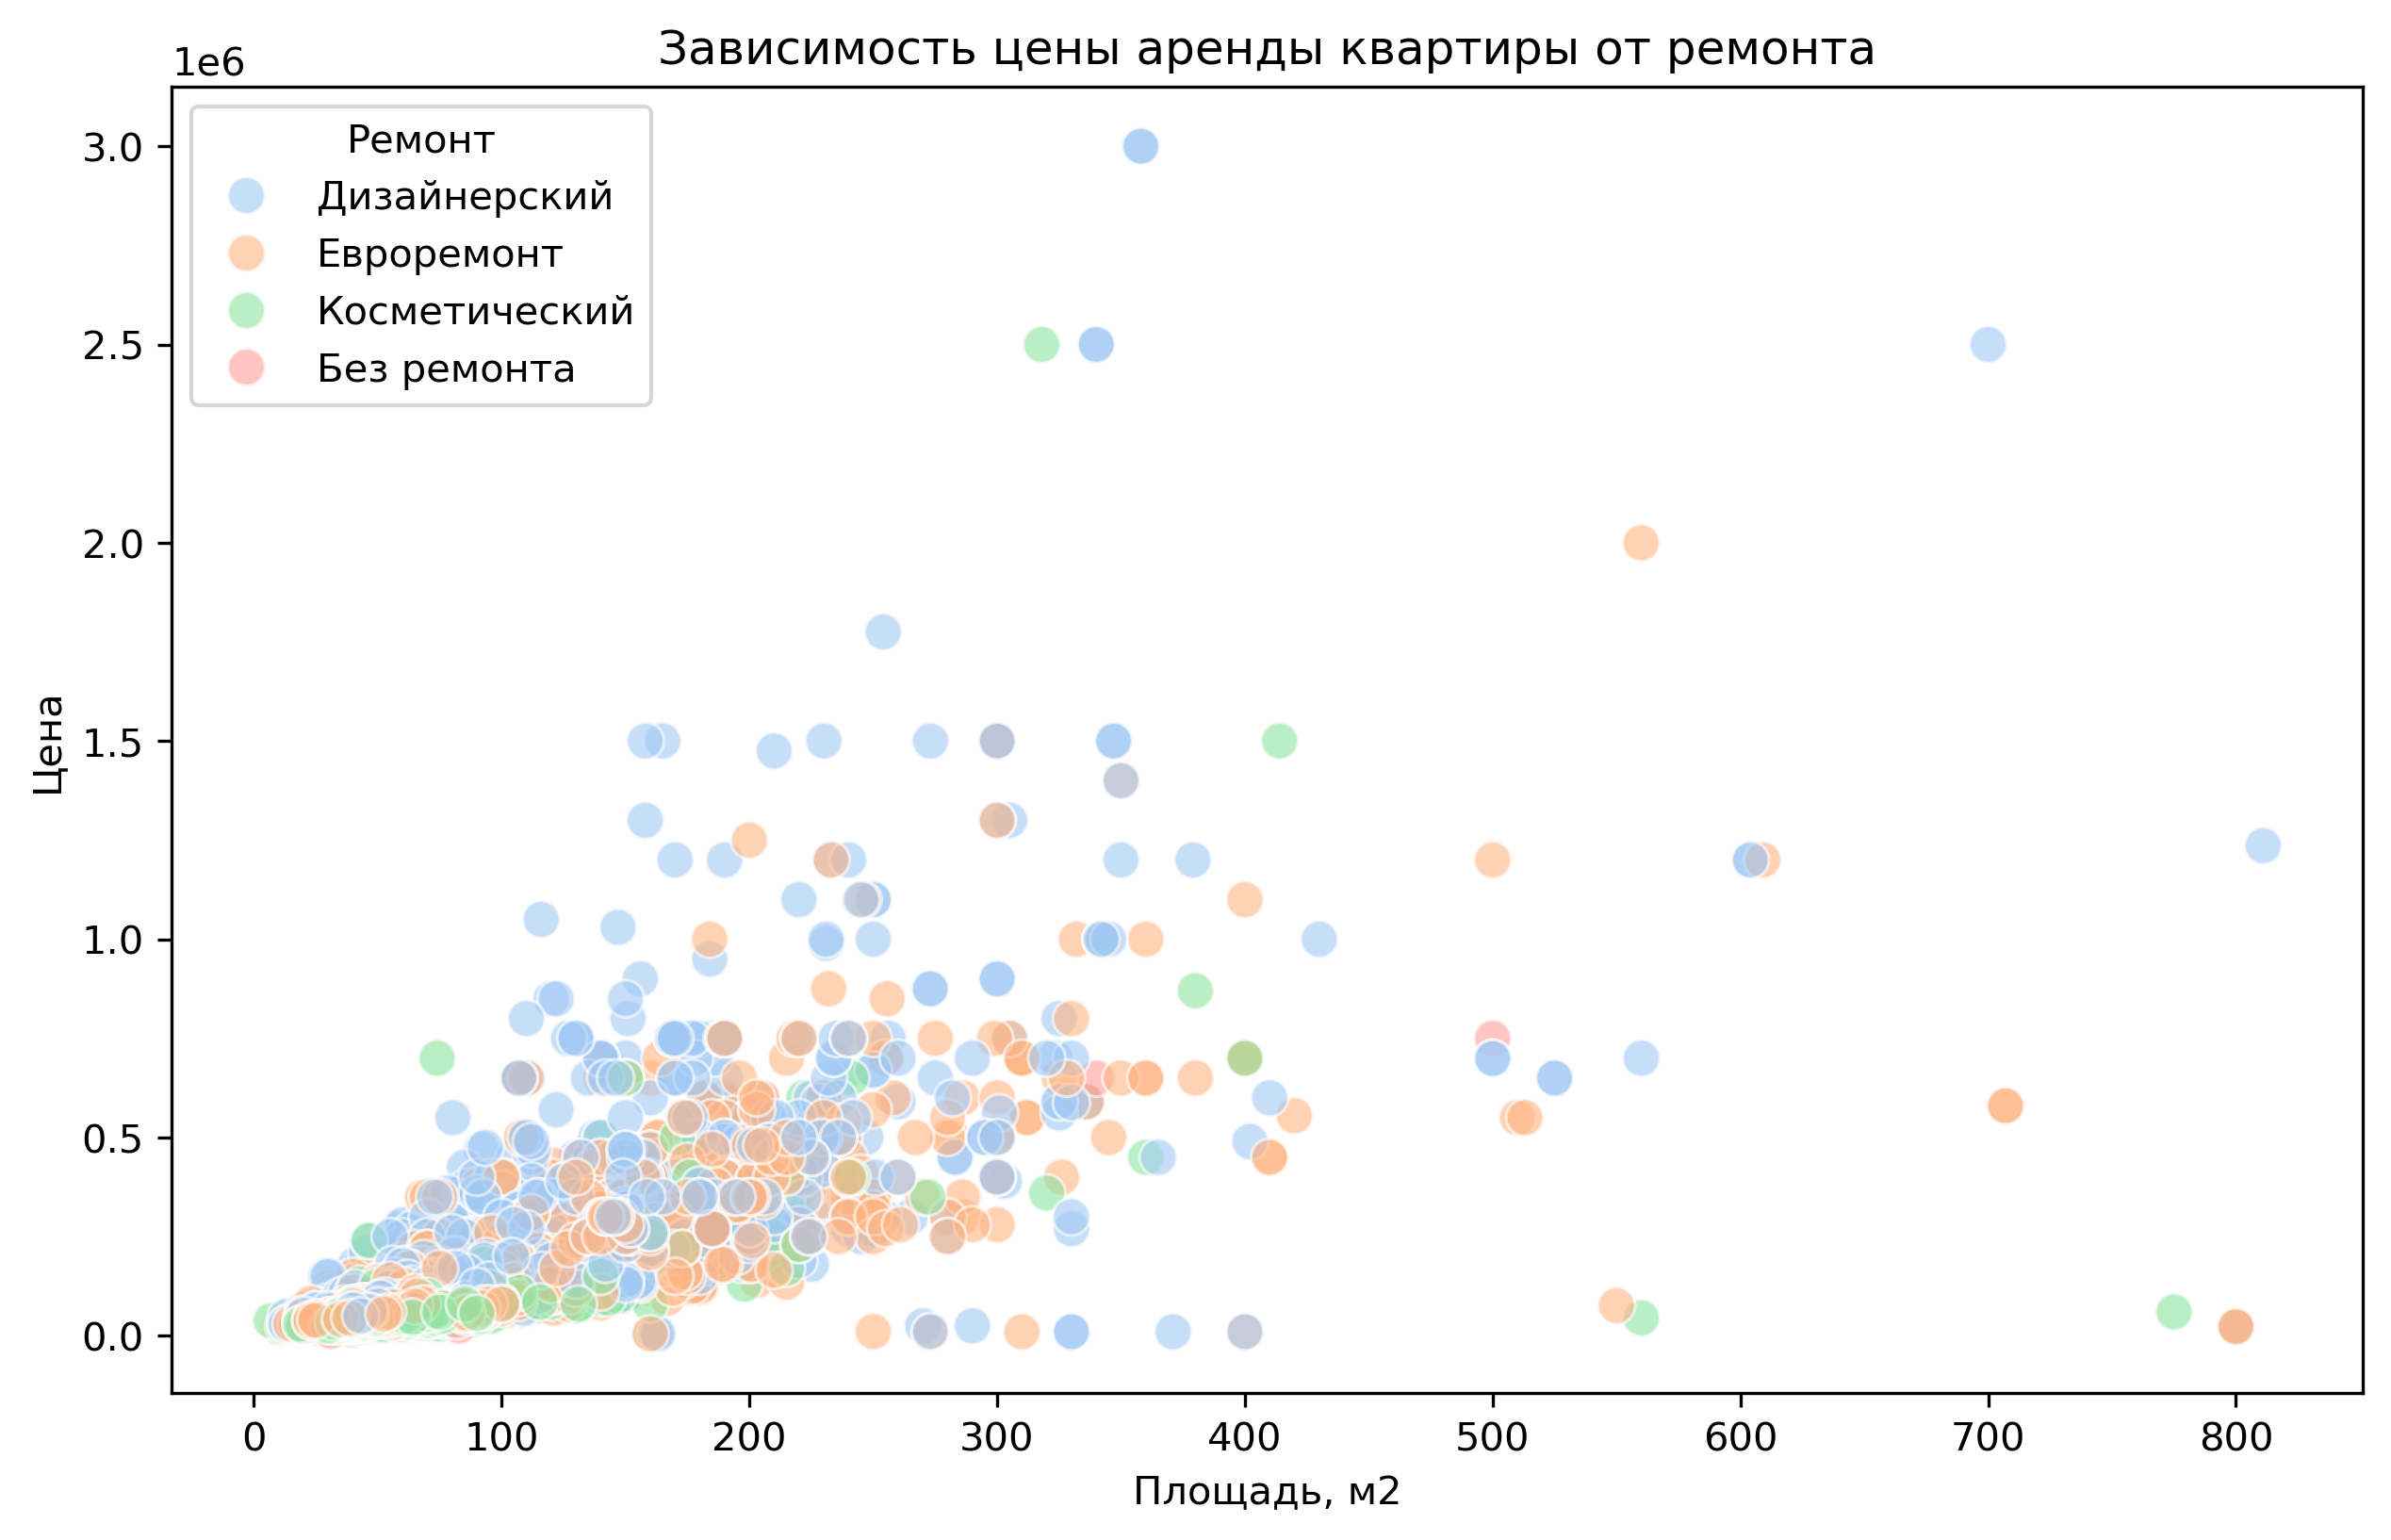

In [15]:
plt.figure(figsize=(10,6),dpi=300)
sns.scatterplot(data= df_m, x= 'Площадь, м2', y = 'Цена', hue='Ремонт', s= 90, alpha=0.6, palette='pastel')
plt.title('Зависимость цены аренды квартиры от ремонта')
# """Как мы видим на графике есмь множество выбросов с очень большой стоимостью аренды, 
# так же можем отметить, что как правило квартиры с евроремонтом и дизайнерским ремонтом сдаются за большую стоимость"""

In [16]:
# Рассмотрим соотношение квартир по станциям метро и по наличию ремонта в них
pd.crosstab(df_m['Метро'],df_m['Ремонт']).head(15).drop('na')
#здесь мы снова встретили пустое значение "na" и убрали его чтоб были результаты наглядней


Ремонт,Без ремонта,Дизайнерский,Евроремонт,Косметический
Метро,,,,
м. Авиамоторная,2,20,49,15
м. Автозаводская,1,5,26,15
м. Академическая,1,22,63,79
м. Александровский сад,0,0,3,0
м. Алексеевская,0,37,64,50
м. Алма-Атинская,2,5,20,35
м. Алтуфьево,1,13,53,87
м. Аминьевская,0,5,10,22
м. Андроновка,1,2,7,3


In [17]:
metro= df_m.groupby('Метро')[['Цена']].sum().sort_values(by='Цена', ascending=False).reset_index().head(15)
metro
#ПОлучаем общую стоимость арендуемых квартир на каждой станции по отдельности

,Метро,Цена
0,м. Кропоткинская,43352699.0
1,м. Парк Культуры,43075000.0
2,м. Смоленская,41342000.0
3,м. Сокол,35207199.0
4,м. Крылатское,28945489.0
5,м. Арбатская,28295000.0
6,м. Новокузнецкая,25316000.0
7,м. Проспект Вернадского,24585600.0
8,м. Маяковская,23290638.0
9,м. Аэропорт,22257590.0


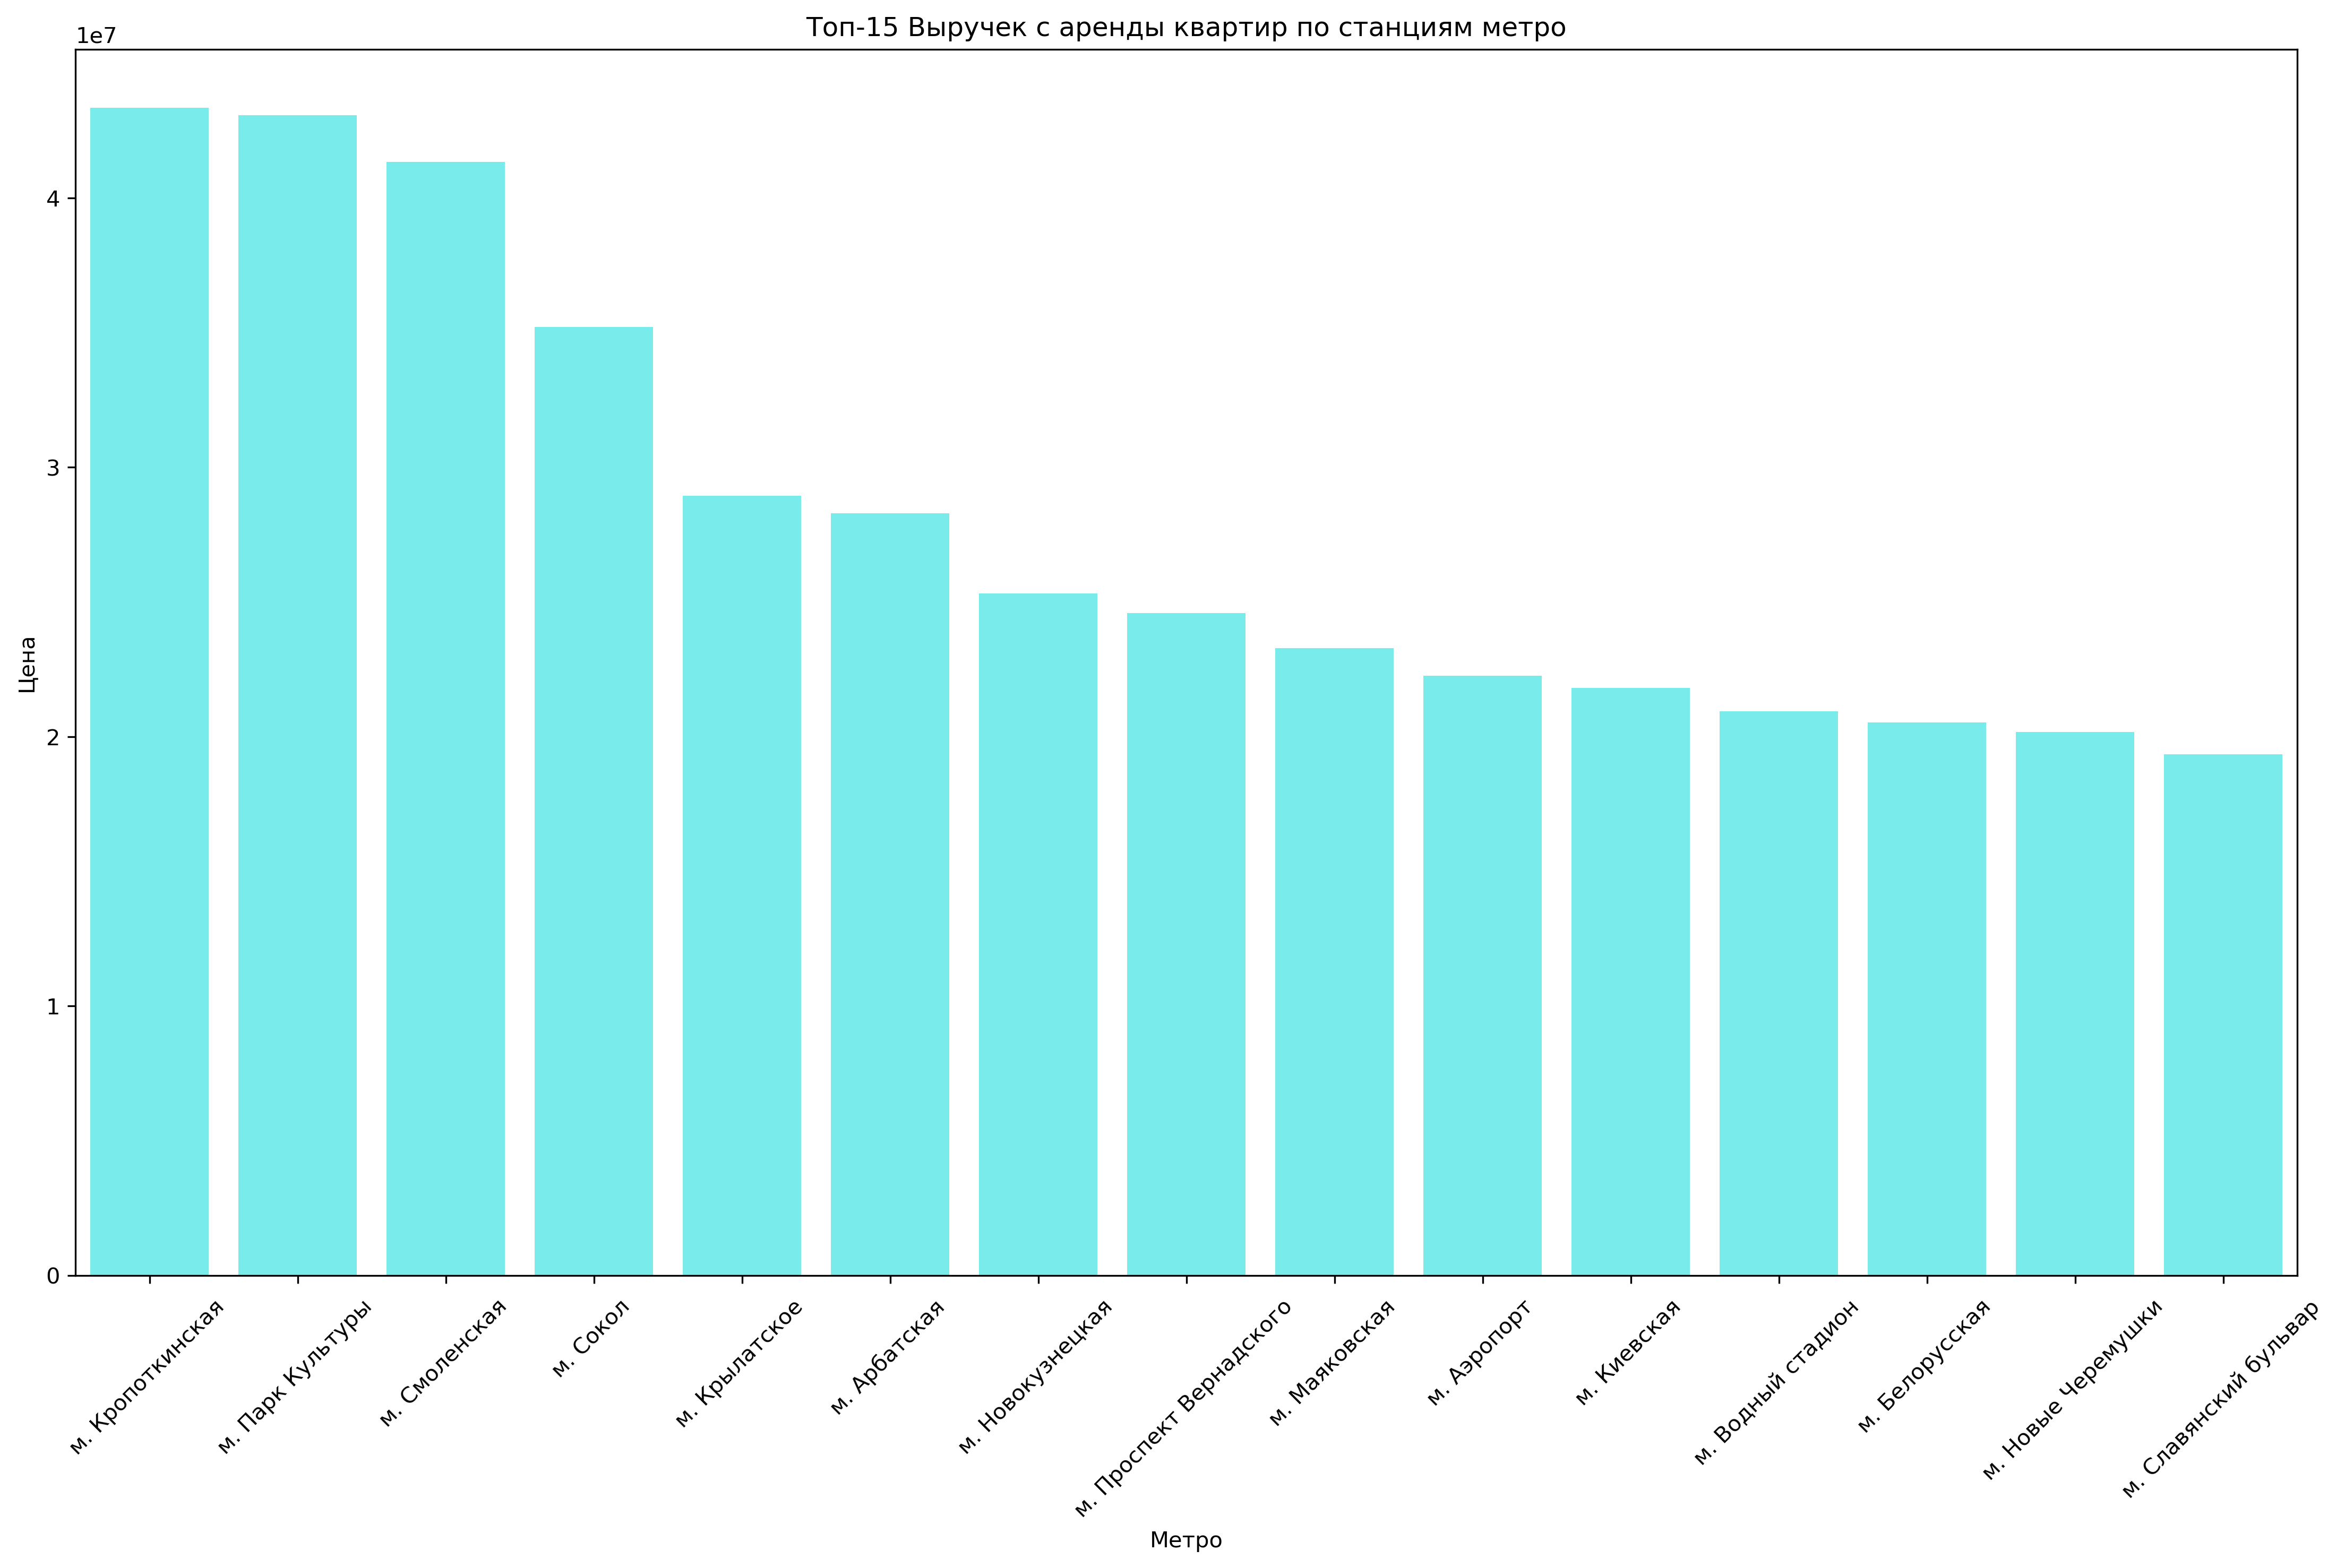

In [18]:
#На основе данных полученых выше сделали столбчатаю диаграмму
plt.figure(figsize=(18,10),dpi=300)
sns.barplot(data= metro, x= 'Метро', y = 'Цена', alpha=0.6,color='cyan')
plt.title('Топ-15 Выручек с аренды квартир по станциям метро')
plt.xticks(rotation=45);


In [19]:
#Найдем соотношение количества объявлений в зависимости от количества комнат
#для начала нужно привести к целочисленному виду "Количество комнат"

In [20]:
df_m['Количество комнат'] = df_m['Количество комнат'].astype('str')
df_m['Количество комнат'] = df_m['Количество комнат'].apply(lambda x: x.split(',')[0] if ',' in x else x)
df_m['Количество комнат']= df_m['Количество комнат'].replace('nan','0').astype('int')



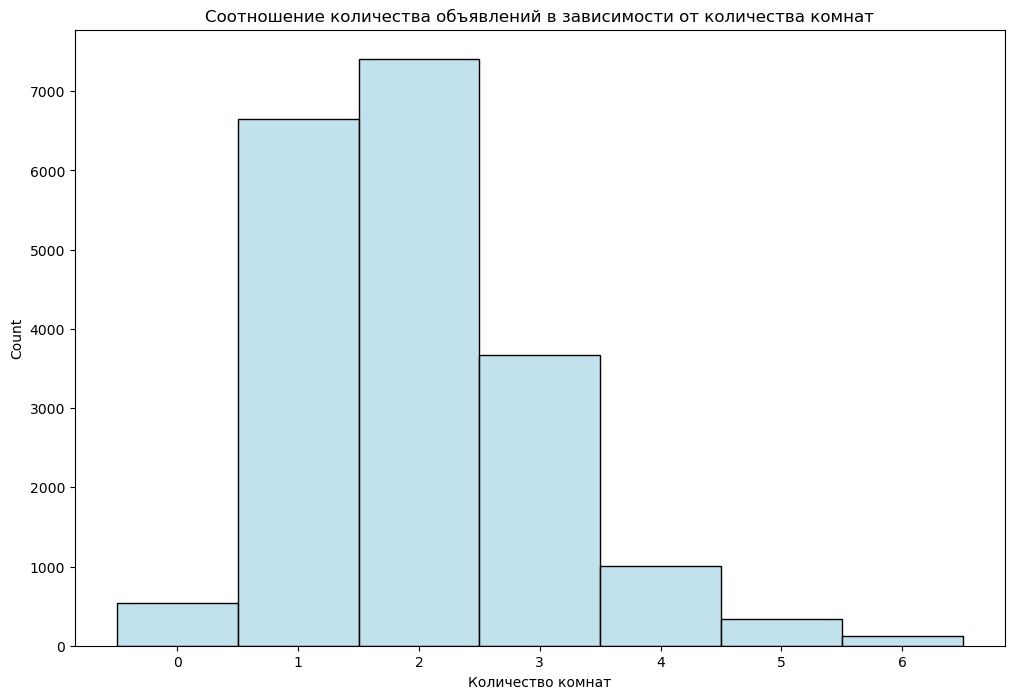

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_m, x='Количество комнат', color='lightblue', binwidth=1,discrete=True)
plt.title('Cоотношение количества объявлений в зависимости от количества комнат')
plt.show()
#Как видим, самой популярной квартирой для сдачи является двухкомнатная

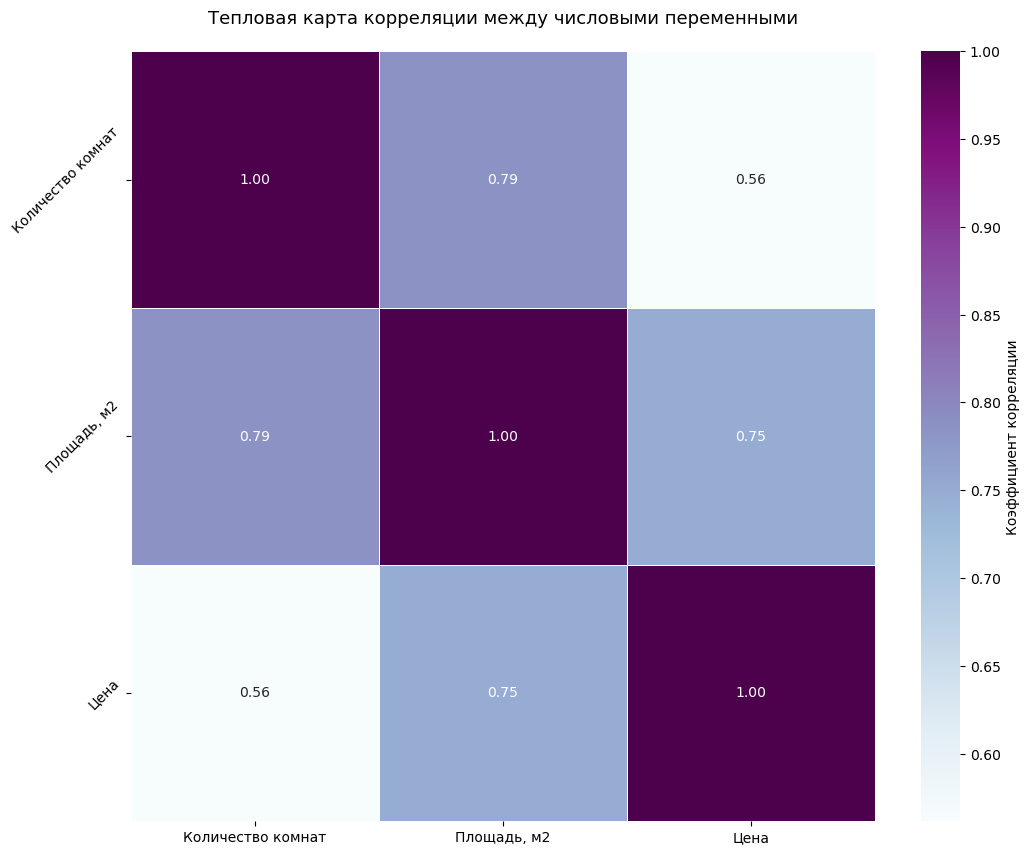

In [22]:
#Сделали тепловую карту зависимости числовых данных DF, видим что наибольшее влияние на цену оказывает площадь
corr_m = df_m.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10),dpi=100)
sns.heatmap(corr_m,
            annot=True,
            fmt='.2f',
            cmap='BuPu',
            linewidths=0.5,
            cbar_kws={'label':'Коэффициент корреляции'})

plt.title('Тепловая карта корреляции между числовыми переменными',fontsize=13, pad=20)
plt.yticks(rotation=45 ,va='center')


plt.show()